In [5]:
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import copy
import sys

sys.path.insert(0, '../Apps')
sys.path.insert(0, '../Integrators')

from FSI import FSI
from Structure import Structure
from Beam import Beam
from IncompressibleFluid import IncompressibleFluid
from MeshGen import mesh_gen
import SDC


from DMD_Cavity_Beam import *


Generating mesh for modified cavity fluid
Generating mesh for modified cavity beam
Generating mesh for modified cavity mesh
9047 186 15876
(4225, 2)
4225 4225 4225 4225
pressure is  0.001728230145415231 -0.00084484273947059
(4225, 2)
4225 4225 4225 4225


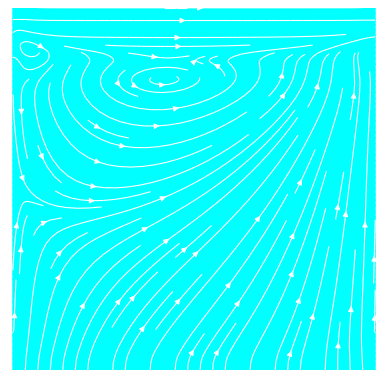

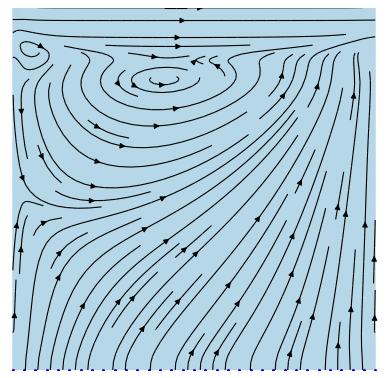

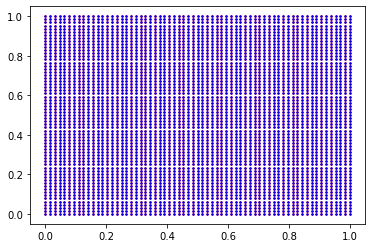

9047 186 15876
(4225, 2)
4225 4225 4225 4225
pressure is  0.009694959811333692 -0.005997302000718533
(4225, 2)
4225 4225 4225 4225


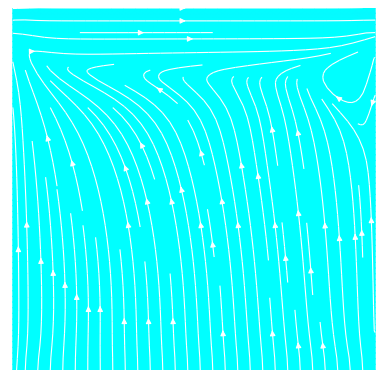

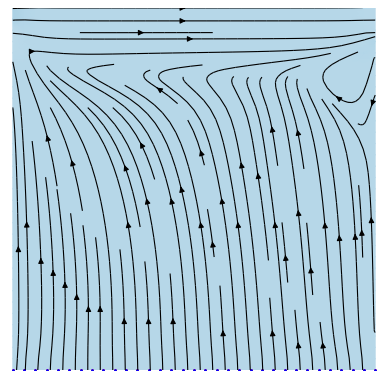

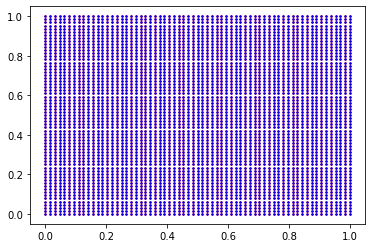

9047 186 15876
(4225, 2)
4225 4225 4225 4225
pressure is  0.024986970661324624 -0.026406240487803774
(4225, 2)
4225 4225 4225 4225


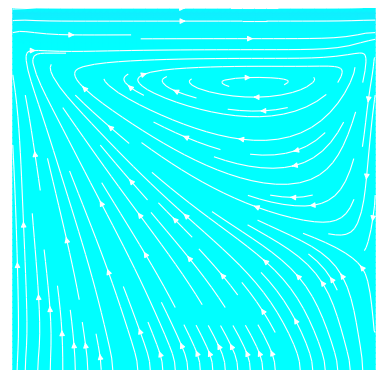

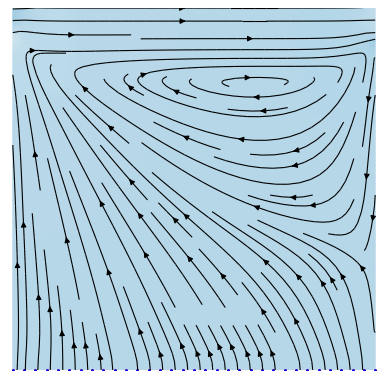

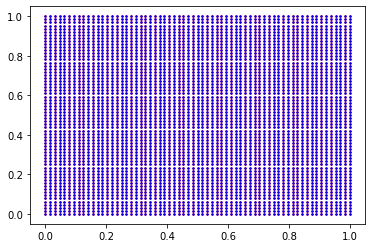

In [29]:
Nx_ = 32
ngp_ = 3
pref = 'bin_SDC2_500_old/'
app = set_app(Nx_, ngp_, pref=pref)

disp = np.zeros(n_end - n_start)


n_start, n_end, n_step = 0, 6, 2
for n in range(n_start, n_end, n_step):
    U = np.load(app.pref + str(n).zfill(5) + '.dat.npy')
    app.visualize_data(U)


In [26]:
def extract_data(app, Nx_, n = 0):
    U = np.load(app.pref + str(n).zfill(5) + '.dat.npy')
    U0, U1, U2 = app.divide(U)
    
    C0 = app.get_coupling_0(U0, U1, U2)
    C2 = app.get_coupling_2(U0, U1, U2)
    
    fluid_all = app.app0.get_full_field(U0, C0)
    
    # velocity du,dv,d\theta, displacement u, v, theta
    structure_all = app.app1.get_full_field(U1)
    
    return fluid_all, structure_all

Generating mesh for modified cavity fluid
Generating mesh for modified cavity beam
Generating mesh for modified cavity mesh


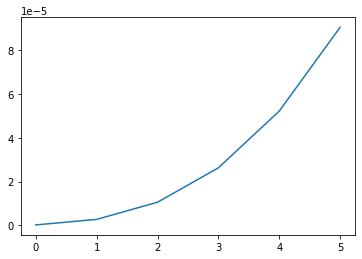

In [28]:
Nx_ = 32
n = 10
ngp = 3
pref='bin_SDC2_500_old/'
n_id = 16
n_start, n_end = 0, 6
disp = np.zeros(n_end - n_start)
app = set_app(Nx_, ngp_, pref=pref)

for n in range(n_start, n_end): 
    fluid_all, structure_all = extract_data(app, Nx_, n)
    disp[n-n_start] = structure_all[n_id, 4]
plt.plot(disp)
    

In [23]:
structure_all.shape

(33, 6)